# HW3: Part 2
## Indexing in Elasticsearch 
---




I use Elasticsearch Cluster (7.17) on three Ubuntu 20.04 nodes, with loadbalancer ip `192.168.57.2`, and listening port `8000`

In [ ]:
import requests
import csv
import json
from tqdm import tqdm

In [ ]:
# Elasticsearch endpoint configuration
ELASTICSEARCH_HOST = "192.168.57.2:8000"
ELASTICSEARCH_USER = "elastic"
ELASTICSEARCH_PASSWORD = "secret"
ELASTICSEARCH_ENDPOINT = "http://" + ELASTICSEARCH_USER + ':' + ELASTICSEARCH_PASSWORD + '@' + ELASTICSEARCH_HOST

In [ ]:
# Index configuration
INDEX_NAME = 'news_index2'
# id is handled by elasticseach as _id
MAPPINGS = '''
{
    "mappings": {
        "properties": {
            "date": {"type": "text"},
            "title": {"type": "text"},
            "intro": {"type": "text"},
            "body": {"type": "text"},
            "category": {"type": "keyword"}
        }
    }
}
'''

In [ ]:
def create_elasticsearch_index(host, index_name, mappings):
    headers = {'Content-Type': 'application/json'}
    response = requests.put(f"{host}/{index_name}?pretty", data=mappings, headers=headers)
    return response.status_code

In [ ]:
def read_data_from_csv(file_path):
    with open(file_path, 'r') as file:
        content = list(csv.DictReader(file))
        return content

In [ ]:
def prepare_data(raw_data):
    prepared_data = {k: v for k, v in raw_data.items() if k}
    return json.dumps(prepared_data)

In [ ]:
def insert_data_to_elasticsearch(elasticsearch_endpoint, index_name, data):
    headers = {'Content-Type': 'application/json'}
    prepared_data = prepare_data(data)
    response = requests.post(f"{elasticsearch_endpoint}/{index_name}/_doc/", data=prepared_data, headers=headers)
    return response.status_code

In [ ]:
def show_index_information(elastic_endpoint, index_name):
    result = requests.post(f"{elastic_endpoint}/{index_name}/_count?pretty").content.decode('ascii')
    print(result)

In [ ]:
def run():
    create_elasticsearch_index(ELASTICSEARCH_ENDPOINT, INDEX_NAME, MAPPINGS)
    data = read_data_from_csv('./dataset.csv')
    for row in tqdm(data):
        result = insert_data_to_elasticsearch(
            ELASTICSEARCH_ENDPOINT, INDEX_NAME, row)
        if result >= 300:
            raise Exception('Request faild')
    print('Secessfully add all data to elasticsearch')
    show_index_information(ELASTICSEARCH_ENDPOINT, INDEX_NAME)


In [ ]:
run()

#### index stats in kibana

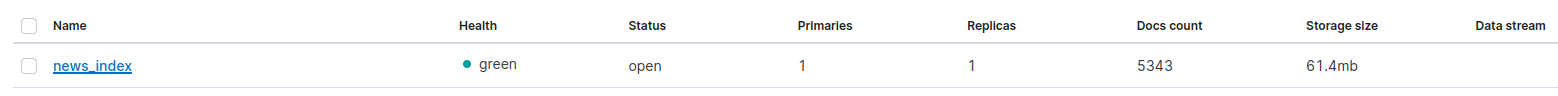